# Machine Learning Engineer Nanodegree - Capstone Project

## Project: ML model to accurately predict whether or not the patients in the dataset have diabetes

### Project Overview 

Diabetes is a major chronic disease that affects more than 30 million people in the United States. The American Diabetes Association released new research on March 22, 2018 estimating the total costs of diagnosed diabetes have risen to \$327 billion in 2017 from \$245 billion in 2012, when the cost was last examined.

It occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood sugar. Hyperglycemia, or raised blood sugar, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, especially the nerves and blood vessels.


### Problem Statement

The goal of this project is to build a machine learning model to predict the onset of diabetes based on some diagnostic measures. The expected outcome of this project is to contribute to the clinical research study related to diabetes.

MAIN OBJECTIVE: Build a mathematical model to predict whether or not a patient has diabetes, based on certain diagnostic measurements.

SECONDARY OBJECTIVE: Identify important features or a set of clusters of features that are highly related to diabetes.

The data includes a binary prediction variable(label) outcome. In this task, it is required to build a function that will map the set of input features with the binary outcome(true/false). I would consider this as a supervised 'binary classification' task.

### Datasets and Inputs

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Source : https://www.kaggle.com/uciml/pima-indians-diabetes-database 

PN : This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

|Feature Name| Description |Datetype |
|:-------------|:-------------|:-----|
|Pregnancies | Number of times pregnant |Numeric|
|Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test|Numeric|
|BloodPressure|Diastolic blood pressure (mm Hg)|Numeric|
|SkinThickness|Triceps skin fold thickness (mm)|Numeric|
|Insulin|2-Hour serum insulin (mu U/ml)|Numeric|
|BMI|Body mass index (weight in kg/(height in m)^2)|Numeric|
|DiabetesPedigreeFunction|Diabetes pedigree function|Numeric|
|Age|Age (years)|Numeric|
|**Outcome**|Class variable (0 or 1)|Numeric|

# 1. Environment and Libraries setp

In [224]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# 2. Analysis

### 2a. Data Exploration

In [225]:
# Load the Diabetes dataset
data = pd.read_csv("diabetes.csv")

# Summary of the records
print ("This dataset has {} samples with {} features each.".format(data.shape[0], data.shape[1]))
#print('We are the {} who say "{}!"'.format('knights', 'Ni'))

# Display the first 10 record
print ("\nDisplay the first 10 record")
display(data.head(n=10))

# Describe the data
print ("Statistical description of dataset\n--------------------------------------")
display(data.describe())

print ('Note\n-----')
print ('All values are numerical')
print ("'Outcome' is the target/label variable that can have only binary value(0/1)\n\n")
data.info()

This dataset has 768 samples with 9 features each.

Display the first 10 record


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Statistical description of dataset
--------------------------------------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Note
-----
All values are numerical
'Outcome' is the target/label variable that can have only binary value(0/1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



Total number of individuals: 768
Individuals with diabetes: 268
Individuals without diabetes: 500
Percentage of individuals with diabetes: 34.90%



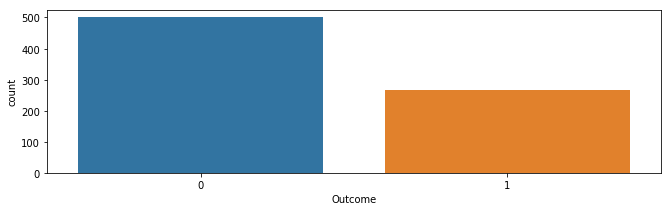

In [226]:
# Evaluate the balance(number of instances per lebel) of the data set 
n_records = data.shape[0]
n_with_diabetes = data[data["Outcome"]==1].shape[0]
n_without_diabetes = data[data["Outcome"]==0].shape[0]
greater_percent = (n_with_diabetes*100)/float(n_records)

print ("\nTotal number of individuals: {}".format(n_records))
print ("Individuals with diabetes: {}".format(n_with_diabetes))
print ("Individuals without diabetes: {}".format(n_without_diabetes))
print ("Percentage of individuals with diabetes: {:.2f}%\n".format(greater_percent))

# Count of instances per Target/Label variable Viz
sns.countplot(data['Outcome'],label="Count")

Note - 
Since 500 out of 768 individuals don't have diabetes, so it would considered as an unbalanced dataset.

### 2b. Exploratory Visualization

#### 2b-1. Check number of 0 or missing values

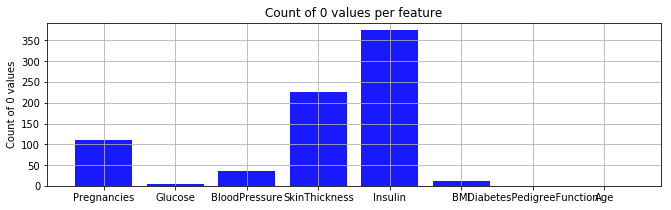

In [227]:
# Missing Or Unwanted 0 values 
featurelist = []
count_of_zero_list = []

for col in data:
    cnt = 0
    for i in data[col]:
        if i==0:
            cnt = cnt + 1
    if col!='Outcome':
        #print (col, "-", cnt)
        featurelist.append(col)
        count_of_zero_list.append(cnt)
        
objects = tuple(featurelist)
y_pos = np.arange(len(featurelist))
performance = count_of_zero_list
 
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 11
fig_size[1] = 3

plt.bar(y_pos, performance, align='center', color='b', alpha=0.9)
plt.xticks(y_pos, objects)

plt.ylabel('Count of 0 values')
plt.title('Count of 0 values per feature')
plt.grid(True)

plt.show()

<b><font color="blue"> Observation </font></b>

Features like 'SkinThickness', 'Insulin' have a significant number of 0 values. 

#### 2b-2. Feature distribution viz using histogram and boxplots

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

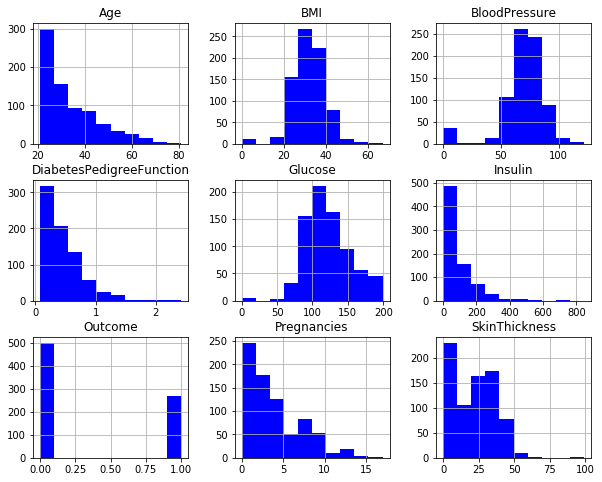

In [228]:
data.hist(figsize=(10,8),color='b')
pd.DataFrame.skew(data, axis=0)

#### <font color="blue">Observation</font>

1. Most attributes like Age, DiabetesPedigree Function, Insuiln are highly skewed towords left.
2. Significant number of missing or zero values for features like 'Insulin' and 'SkinThickness' have significant effect on their distribution. While building the model, these should be imputed properly. 

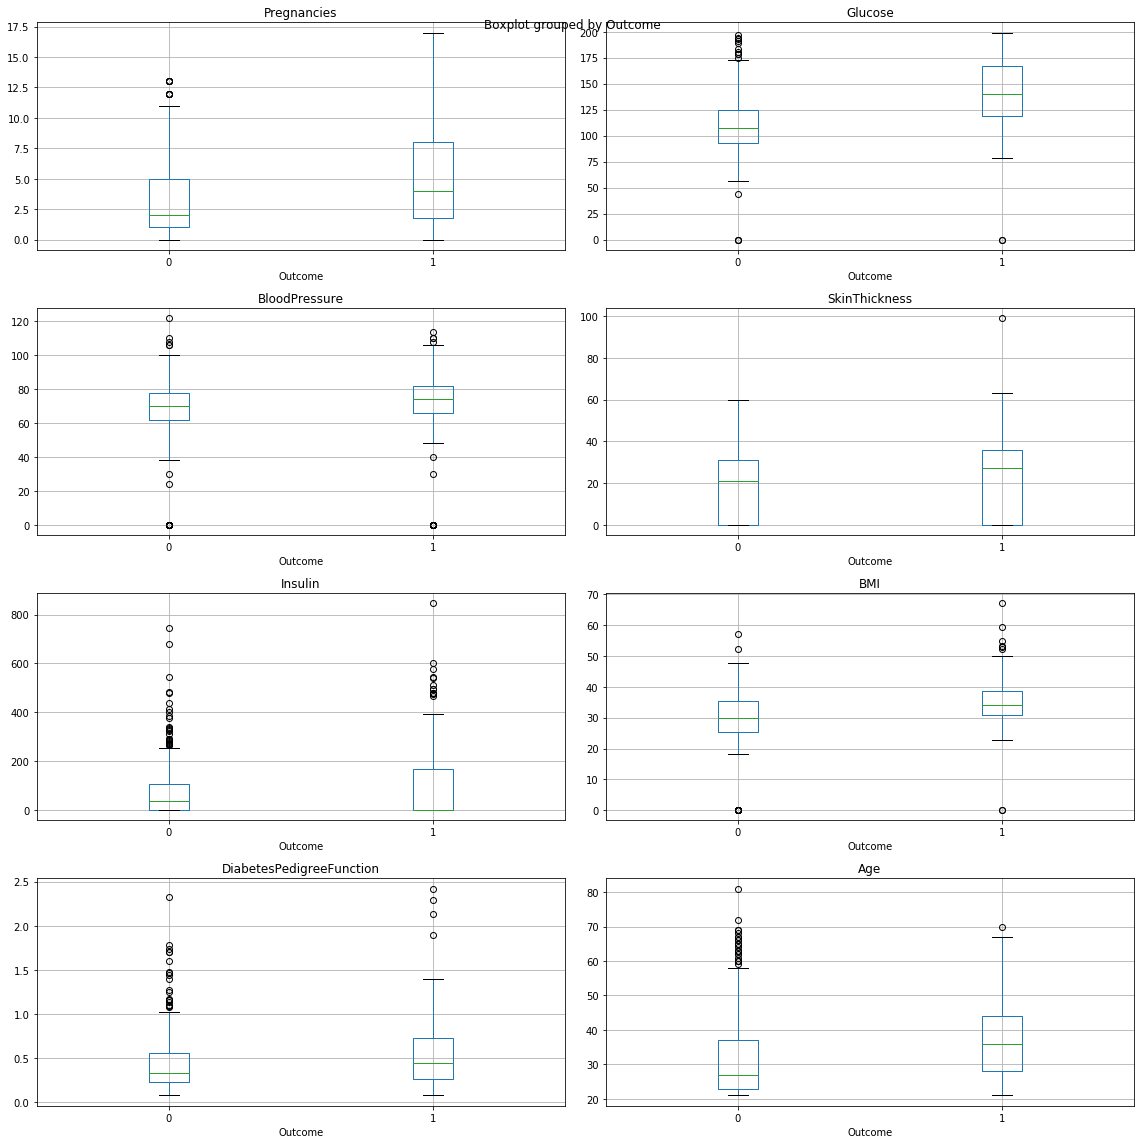

In [229]:
# Comparing distributions, the centre, spread and overall range  w.r.t two binary outcome(0/1) 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,16))

data.boxplot(column='Pregnancies', by='Outcome',ax=axes[0,0])
data.boxplot(column='Glucose', by='Outcome', ax=axes[0,1])
data.boxplot(column='BloodPressure', by='Outcome',ax=axes[1,0])
data.boxplot(column='SkinThickness', by='Outcome', ax=axes[1,1])
data.boxplot(column='Insulin', by='Outcome',ax=axes[2,0])
data.boxplot(column='BMI', by='Outcome', ax=axes[2,1])
data.boxplot(column='DiabetesPedigreeFunction', by='Outcome',ax=axes[3,0])
data.boxplot(column='Age', by='Outcome', ax=axes[3,1])

fig.tight_layout()

#### <font color="blue">Observation</font>

|Feature comparision with Outcome(0/1)| Comments(w.r.t median and outlier) |
|:-------------------------------------|:-------- |
|Pregnancies                 |Patients with higher number of pregnancies are prone to diabetes|
|Glucose                     |High Glucose amount increases the chance of diabetes|
|BloodPressure               |NA|
|SkinThickness               |Higher value of 'Triceps skin fold thickness (mm)' gives an indication of diabetes|
|Insulin                     |There are too many missing or zero values. We need to impute the missing values|
|BMI                         |Higher BMI value increases the chance of diabetes|
|DiabetesPedigreeFunction    |Patients with high DiabetesPedigreeFunction are prone to diabetes|
|Age                         |Median age of diabetes patients is ~8 yrs more than same of non-diabetic patients|


#### 2b-3. Features correlations

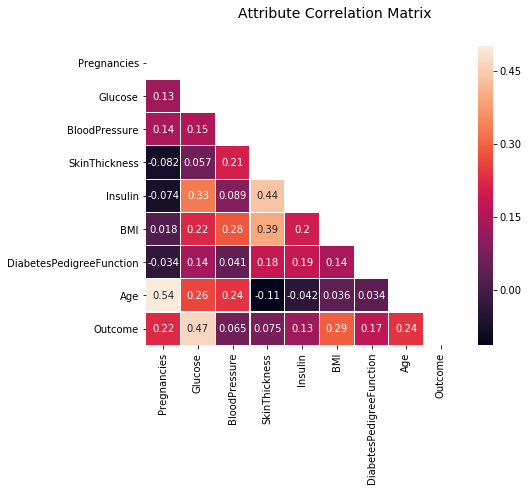

In [230]:
# calculate correlation
corr = data.corr()

# plot correlation matrix
fig = plt.figure(figsize=(7, 5.5))
mask = np.zeros_like(corr, dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask, vmax=0.5,linewidths=0.1)
fig.suptitle('Attribute Correlation Matrix', fontsize=14)

#### <font color="blue">Observation</font>

Following pairs have a high correlation score. 

1. Age and Pregnancies (0.54)
2. Outcome and Glucose  (0.47)
3. Insulin and SkinThickness (0.44) 
4. BMI and SkinThickness (0.39)

<b>Reference - [Plotting a diagonal correlation matrix](Plotting a diagonal correlation matrix)</b>

# 3. Methodology

-  3a. Data Preprocessing
-  3b. Evaluation Metrics 
-  3c. Define Train/Test Dataset
-  3d. Define Benchmark
-  3e. Implementation 
    -  3e-1. Creating a Training and Predicting Pipeline
    -  3e-2. Model comparision and selection
    -  3e-3. Model improvement using parameter tuning
-  3f. Comparision with Benchmark

In [231]:
# Split the data into features and target label
outcome = data['Outcome']
features = data.drop('Outcome', axis = 1)
features_backup = data.drop('Outcome', axis = 1)

## 3a. Data Preprocessing

Objective - Before using this data as input for ML algo, it needs to be cleaned, formatted, and restructured. This preprocessing should help with the outcome(diabetes/non-diabetes) and predictive power of the model.

* 3a-1. Data Cleaning ( Impute missing values )
* 3a-2. Transform numeric values in log scale ( minimize the effect of outliers )
* 3a-3. Scale numeric values ( 0 to 1 scale )


### 3a-1. Data Cleaning

Replace 0 values with the corresponding column mean. Since it might have some bad effect on the model, we might need to revert this operation for a subset of the columns while refining the model.

Following are the top 4 features w.r.t number of 0 values. 
- SkinThickness, 
- Insulin
- Pregnencies
- BloodPressure

Other than the 'pregnencies', almost none of them should logically contain 0 values. Here, 0 values are replaced with the correponding column mean. 

In [232]:
display(features.head(n=5))
print("Mean values of 'SkinThickness', 'Insulin', 'BMI'\n--------------------------------------------------------\n")
print(round(features[['SkinThickness', 'Insulin', 'BMI']].mean(),2))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Mean values of 'SkinThickness', 'Insulin', 'BMI'
--------------------------------------------------------

SkinThickness    20.54
Insulin          79.80
BMI              31.99
dtype: float64


In [233]:

features[['SkinThickness', 'Insulin', 'BMI']] = features[['SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
print("Mean values of 'SkinThickness', 'Insulin','BMI'(after excluding 0 values)'\n--------------------------------------------------------------------------------------\n")
print(round(features[['SkinThickness', 'Insulin','BMI']].mean(),2))
display(features.head(n=5))

Mean values of 'SkinThickness', 'Insulin','BMI'(after excluding 0 values)'
--------------------------------------------------------------------------------------

SkinThickness     29.15
Insulin          155.55
BMI               32.46
dtype: float64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.0,NaN,33.6,0.627,50
1,1,85,66,29.0,NaN,26.6,0.351,31
2,8,183,64,NaN,NaN,23.3,0.672,32
3,1,89,66,23.0,94.0,28.1,0.167,21
4,0,137,40,35.0,168.0,43.1,2.288,33


In [234]:
features[['SkinThickness', 'Insulin', 'BMI']] = features[['SkinThickness', 'Insulin', 'BMI']].fillna(features[['SkinThickness', 'Insulin', 'BMI']].mean())     
display(features.head(n=5))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.00000,155.548223,33.6,0.627,50
1,1,85,66,29.00000,155.548223,26.6,0.351,31
2,8,183,64,29.15342,155.548223,23.3,0.672,32
3,1,89,66,23.00000,94.000000,28.1,0.167,21
4,0,137,40,35.00000,168.000000,43.1,2.288,33


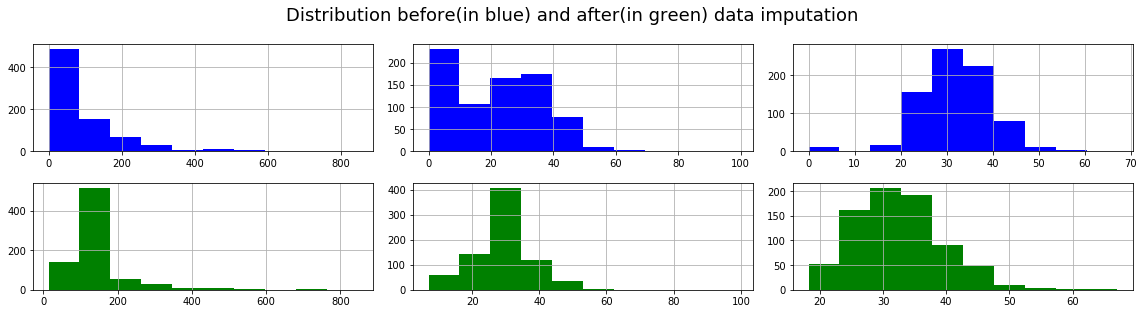

In [235]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,4))
fig.suptitle('Distribution before(in blue) and after(in green) data imputation', fontsize=18, y=1.08)

for i, feature in enumerate(['Insulin', 'SkinThickness', 'BMI']):
    data[feature].hist(color='b',ax=axes[0,i])
    features[feature].hist(color='g',ax=axes[1,i])

fig.tight_layout()

#### 3a-2. Data transformation 
Fields like 'Age', 'Pregnancies', 'DiabetesPedigreeFunction' are highly skewed towords left. 
To minimize the effect of any very large and very small values, log transformations is performed. 

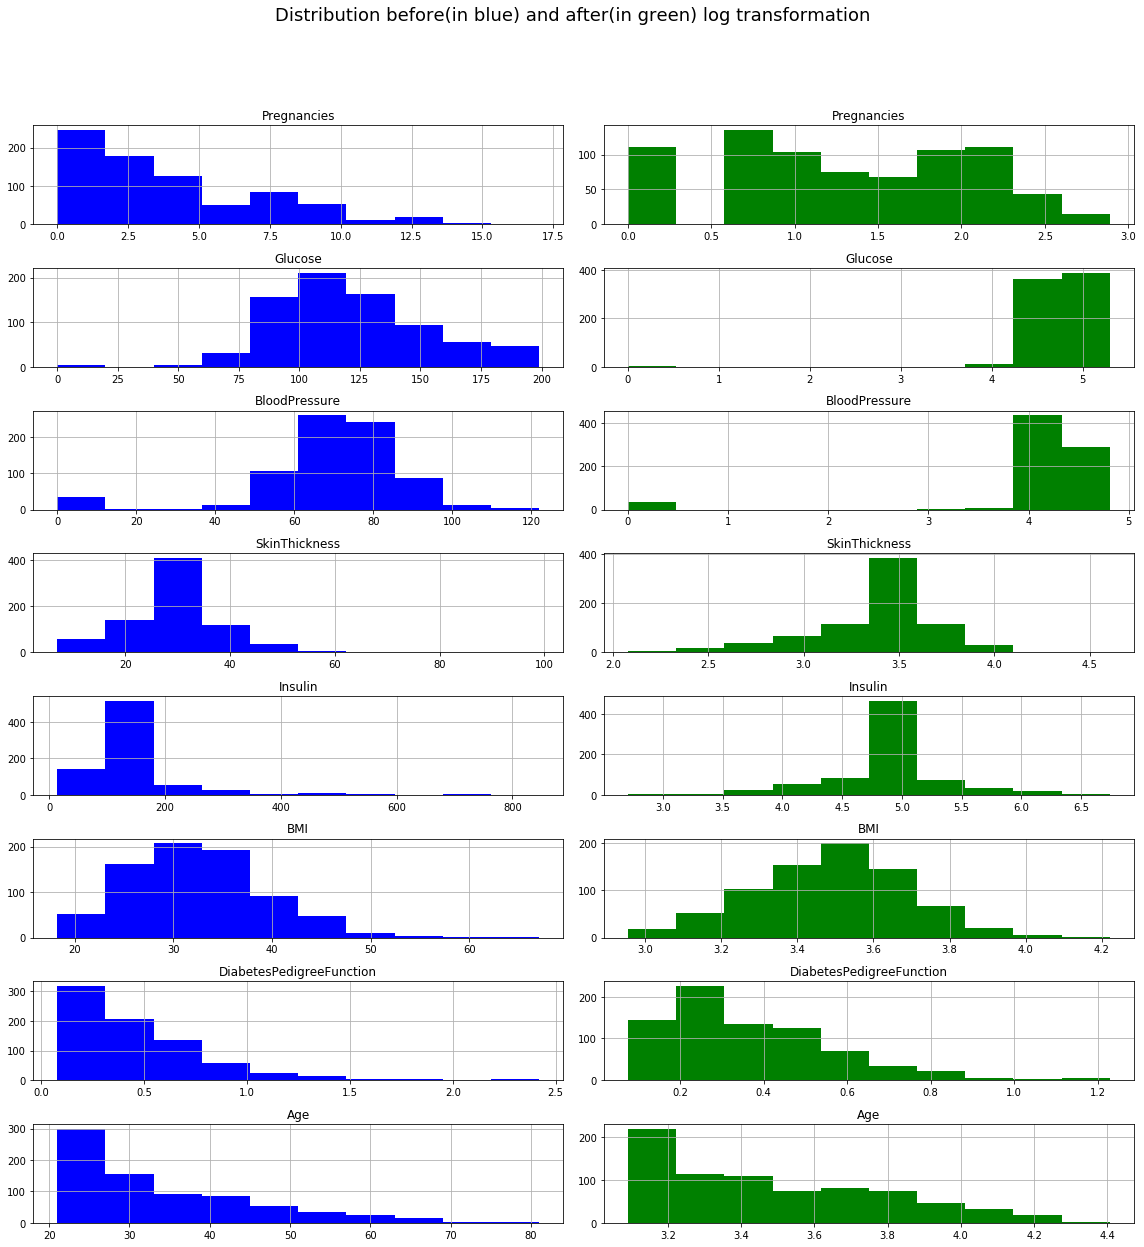

In [236]:
features_log_transformed = features.apply(lambda x: np.log(x+1))

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(16,16))

for i, feature in enumerate(features):
    features[[feature]].hist(color='b',ax=axes[i,0])
    features_log_transformed[[feature]].hist(color='g',ax=axes[i,1])

fig.suptitle('Distribution before(in blue) and after(in green) log transformation', fontsize=18, y=1.08)

fig.tight_layout()

features_log_transformed.to_csv("features_log_transformed.csv")

#### <font color="blue">Observation</font>


#### 3a-3. Scale numeric values ( 0 to 1 scale ) 

Data normalization ensures that each feature is treated equally when applying supervised learners. 

In [237]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

features_log_minmax_transformed = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transformed[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transformed.head(n = 5))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.673239,0.944441,0.891583,0.595502,0.581437,0.465176,0.356534,0.639050
1,0.239812,0.840710,0.873760,0.523317,0.581437,0.286640,0.195523,0.284791
2,0.760188,0.984263,0.867462,0.525336,0.581437,0.186061,0.380165,0.308180
3,0.239812,0.849290,0.873760,0.434968,0.457607,0.328441,0.068711,0.000000
4,0.000000,0.929966,0.771702,0.595502,0.600411,0.656797,0.965907,0.330870


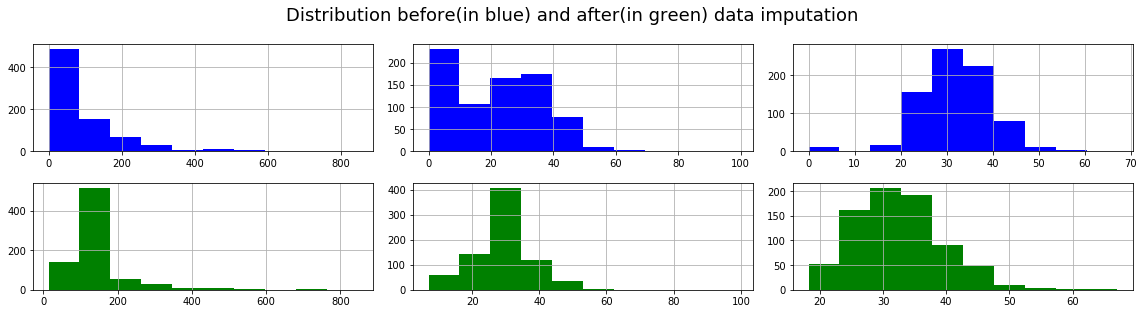

In [259]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,4))
fig.suptitle('Distribution before(in blue) and after(in green) data imputation', fontsize=18, y=1.08)

for i, feature in enumerate(['Insulin', 'SkinThickness', 'BMI']):
    data[feature].hist(color='b',ax=axes[0,i])
    features[feature].hist(color='g',ax=axes[1,i])

fig.tight_layout()

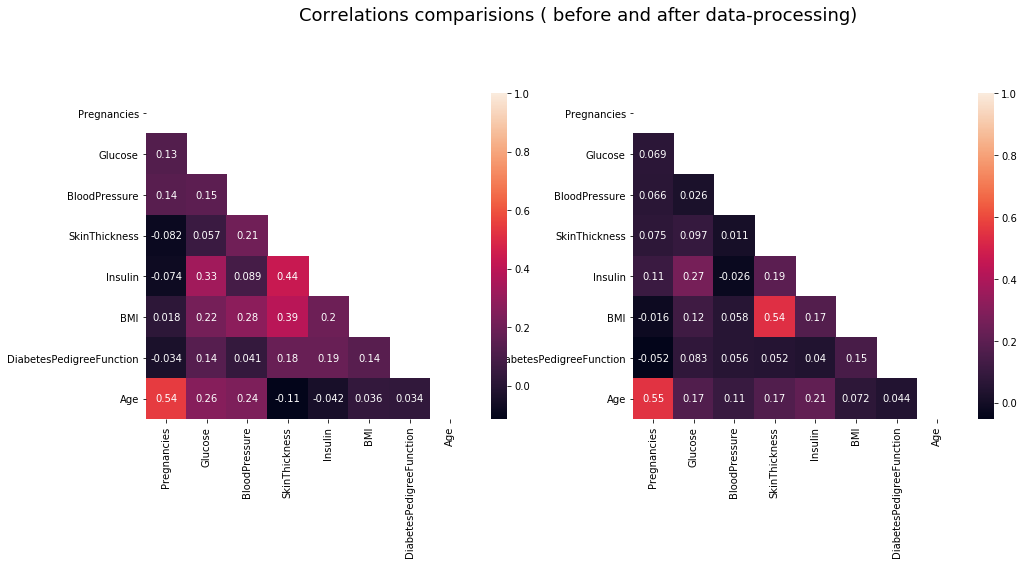

In [239]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.suptitle('Correlations comparisions ( before and after data-processing)', fontsize=18, y=1.08)

mask = np.zeros_like(features_backup.corr(), dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
sns.heatmap(features_backup.corr(), mask=mask, annot=True,ax=axes[0])

mask = np.zeros_like(features_log_minmax_transformed.corr(), dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
sns.heatmap(features_log_minmax_transformed.corr(), mask=mask, annot=True,ax=axes[1])

#### <font color="blue">Observation</font>

## 3b. Evaluation Metrics 

While evaluating the performance of the benchmark models and best solution model, I will consider the 'model accuracy' using train/test split or K-fold cross-validation. The input dataset is bit unbalanced(~35%:65%) w.r.t the prediction variable 'outcome', so I will leverage the 'recall' factor and use 'confusion matrix' to measure different types of prediction. Since this model will be used to disease diagnosis, we will try to minimize the 'false negative' type error (i.e A result that appears negative when it should not).

In this case, we would use F2 Score since it favors 'recall' over 'precision'.

Related formula

* Fβ score = (1+β2) * (precision⋅recall / (β2⋅precision)+recall)

In this cases, β = 2.

* Precision = [True Positives/(True Positives + False Positives)]

* Recall = [True Positives/(True Positives + False Negatives)]

## 3c. Define train/test dataset
Data is splitted in 8:2 proportion to created training and testing set

In [240]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_log_minmax_transformed, 
                                                    outcome, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 614 samples.
Testing set has 154 samples.


## 3d. Benchmark 

### <font color='b'>Benchmark-1 : Naive Model</font>
Since 500 out of 768 individuals don't have diabetes, so we would consider this an unbalanced dataset. 
- <b> A naive benchmark model for this problem would be to predict that none of the patients have diabetes. </b>

Number of diabetic vs non-diabetic patients in the test dataset
0    107
1     47
Name: Outcome, dtype: int64

Naive Model KPI
-----------------
-> naive_precision_score : 0.31
-> naive_recall_score : 1.0
-> naive_f2_score : 0.69
-> naive_accuracy_score : 0.31
<class 'numpy.ndarray'>

TN = 0, FP = 107, FN = 0, TP = 47


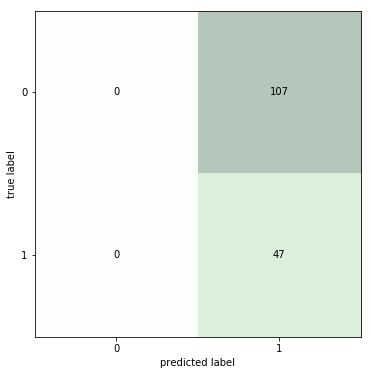

In [392]:
from sklearn.metrics import recall_score, accuracy_score,  fbeta_score, precision_score

# Count of instances per Target/Label variable Viz
# sns.countplot(y_test.values,label="Count")
print("Number of diabetic vs non-diabetic patients in the test dataset")
print(y_test.value_counts())
predictions_test = [1] * X_test.shape[0]

results = {}
print("\nNaive Model KPI\n-----------------")
results['naive_accuracy_score'] = accuracy_score(y_test.values, predictions_test)
results['naive_precision_score'] = precision_score(y_test.values, predictions_test)
results['naive_recall_score'] = recall_score(y_test.values, predictions_test)    
results['naive_f2_score'] = fbeta_score(y_test.values, predictions_test, beta=2)

for key, value in results.items():
    print("-> {} : {}".format(key, round(value,2)))
    
from sklearn.metrics import confusion_matrix
print (type(y_test.values))
cm = confusion_matrix(y_test.values, predictions_test)
tn, fp, fn, tp =  cm.ravel()
print ("\nTN = {}, FP = {}, FN = {}, TP = {}".format(tn, fp, fn, tp))

# Confusion Matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6,6), cmap="Greens")
plt.show()

### <font color='b'>Benchmark-2 : Domain Knowledge-based Model</font>

According to several legitimate sources, Type-2 diabetes is correlated with obesity and/or BMI. Following article suggests that Overweight was defined as having a body mass index between 25 and 29.9. http://www.diabetesincontrol.com/body-mass-index-and-type-2-diabetes-risk/

- <b> I'll consider the average(27.5) of the above BMI range(25 to 29.9) as a threshold of this domain knowledge-based model. If a patient's BMI is above 27.5 then this model will diagnosis 'diabetes'. </b>

log_of_27_5 - 3.33
Sclaed value of log_of_27_5 - 0.3

Naive Model KPI
-----------------
-> naive_precision_score : 0.38
-> naive_recall_score : 0.89
-> naive_f2_score : 0.7
-> naive_accuracy_score : 0.51
<class 'numpy.ndarray'>

TN = 37, FP = 70, FN = 5, TP = 42
Recall - [0.8936170212765957]
Precision - [0.375] - Formula gen - 0.512987012987013
???? 0.512987012987
???? 0.375


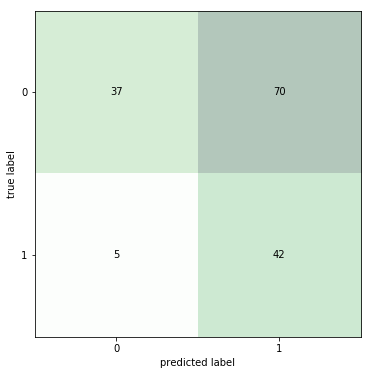

In [393]:
gmi_log_min = 0
gmi_log_max = 0

for ind, feature in enumerate(features_log_minmax_transformed):
    if feature=='BMI':
        #print(ind, scaler.data_min_[ind], scaler.data_max_[ind])
        gmi_log_min = scaler.data_min_[ind] 
        gmi_log_max = scaler.data_max_[ind]
        
# BMI - 28 is the cut-off value.
# Find the log value of 28.
log_of_27_5 = round(np.log(28),2)
print("log_of_27_5 - {}".format(log_of_27_5))

# Scale the log(28) to compare it with other BMI values.
scaled_value_log_of_27_5 = round((log_of_27_5 - gmi_log_min)/(gmi_log_max - gmi_log_min),2)
print("Sclaed value of log_of_27_5 - {}".format(scaled_value_log_of_27_5))

predictions_test = [1 if x>scaled_value_log_of_27_5 else 0 for x in X_test['BMI']]

# evaluation
results = {}
print("\nNaive Model KPI\n-----------------")
results['naive_accuracy_score'] = accuracy_score(y_test.values, predictions_test)
results['naive_precision_score'] = precision_score(y_test.values, predictions_test)
results['naive_recall_score'] = recall_score(y_test.values, predictions_test)    
results['naive_f2_score'] = fbeta_score(y_test.values, predictions_test, beta=2)

for key, value in results.items():
    print("-> {} : {}".format(key, round(value,2)))
    
from sklearn.metrics import confusion_matrix
print (type(y_test.values))
cm = confusion_matrix(y_test.values, predictions_test)
tn, fp, fn, tp =  cm.ravel()
print ("\nTN = {}, FP = {}, FN = {}, TP = {}".format(tn, fp, fn, tp))

Recall = [tp/(tp + fn)]
Precision = [tp/(tp + fp)]
print("Recall - {}".format(Recall))
print("Precision - {} - Formula gen - {}".format(Precision,accuracy_score(y_test.values, predictions_test)))
print("????",accuracy_score(y_test.values, predictions_test, normalize=True))
print("????",precision_score(y_test.values, predictions_test))


# Confusion Matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6,6), cmap="Greens")
plt.show()

##  <font color='b'>3e. Implementation</font>

The following are some of the supervised learning models that are currently available in scikit-learn that you may choose from:

- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

In [269]:
# 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Ensemble Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#DL
from sklearn.neural_network import MLPClassifier

classifiers = []

classifiers.append(('GNB', GaussianNB()))
classifiers.append(('DT', DecisionTreeClassifier(random_state=19, max_depth=4)))
classifiers.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
classifiers.append(('LR', LogisticRegression(random_state=19)))
classifiers.append(('RF', RandomForestClassifier(random_state=19)))
classifiers.append(('GB', GradientBoostingClassifier(random_state=19)))
classifiers.append(('ADB', AdaBoostClassifier(random_state=19)))
classifiers.append(('MLP', MLPClassifier(random_state=19, hidden_layer_sizes=200)))

print ("\nClassifier with default parameters list\n=========================================\n")
for ind, model in enumerate(classifiers):
    model_name, model_class = model
    print("\n{}. Model - {}\n-------------\n{}\n".format(ind+1, model_name, model_class))


Classifier with default parameters list


1. Model - GNB
-------------
GaussianNB(priors=None)


2. Model - DT
-------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=19,
            splitter='best')


3. Model - KNN
-------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


4. Model - LR
-------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=19, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


5. Model - RF
-------------
RandomFores

### 3e-1. Creating a Training and Predicting Pipeline

Generic training and predicting pipeline to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. 

Steps:

- Fit the learner to the sampled training data and record the training time.
- Perform predictions on the test data X_test, and also on the first 50% (or first 300) of the training data(X_train).
- Record the total prediction time.
- Calculate the accuracy score for both the training subset and testing set.
- Calculate the F-score for both the training subset and testing set.
- Make sure that you set the beta parameter!

In [244]:
def train_predict_pipeline(model_name, best_clf, sample_seze_index):
    train_results = []
    test_results = []
    
    for i, samples in enumerate(sample_seze_index):
        best_clf.fit(X_train[:samples], y_train[:samples])
        #print(best_clf.feature_importances_)

        pred_train = best_clf.predict(X_train[:300])
        pred_test = best_clf.predict(X_test)

        f2_score_train = fbeta_score(y_train[:300], pred_train[:300], beta=2)
        f2_score_test = fbeta_score(y_test, pred_test, beta=2)

        train_results.append(f2_score_train)
        test_results.append(f2_score_test)

        # print ("Modle - {} executed".format(name))
        
    return train_results, test_results

In [245]:
#Training samples
index = [0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.90, 1]
sample_seze_index = []

for ind in index:
    sample_seze_index.append(int(X_train.shape[0]*(ind)))
    
print(sample_seze_index)


[30, 61, 153, 245, 307, 460, 552, 614]


/Users/mmukherjee/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/mmukherjee/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/mmukherjee/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


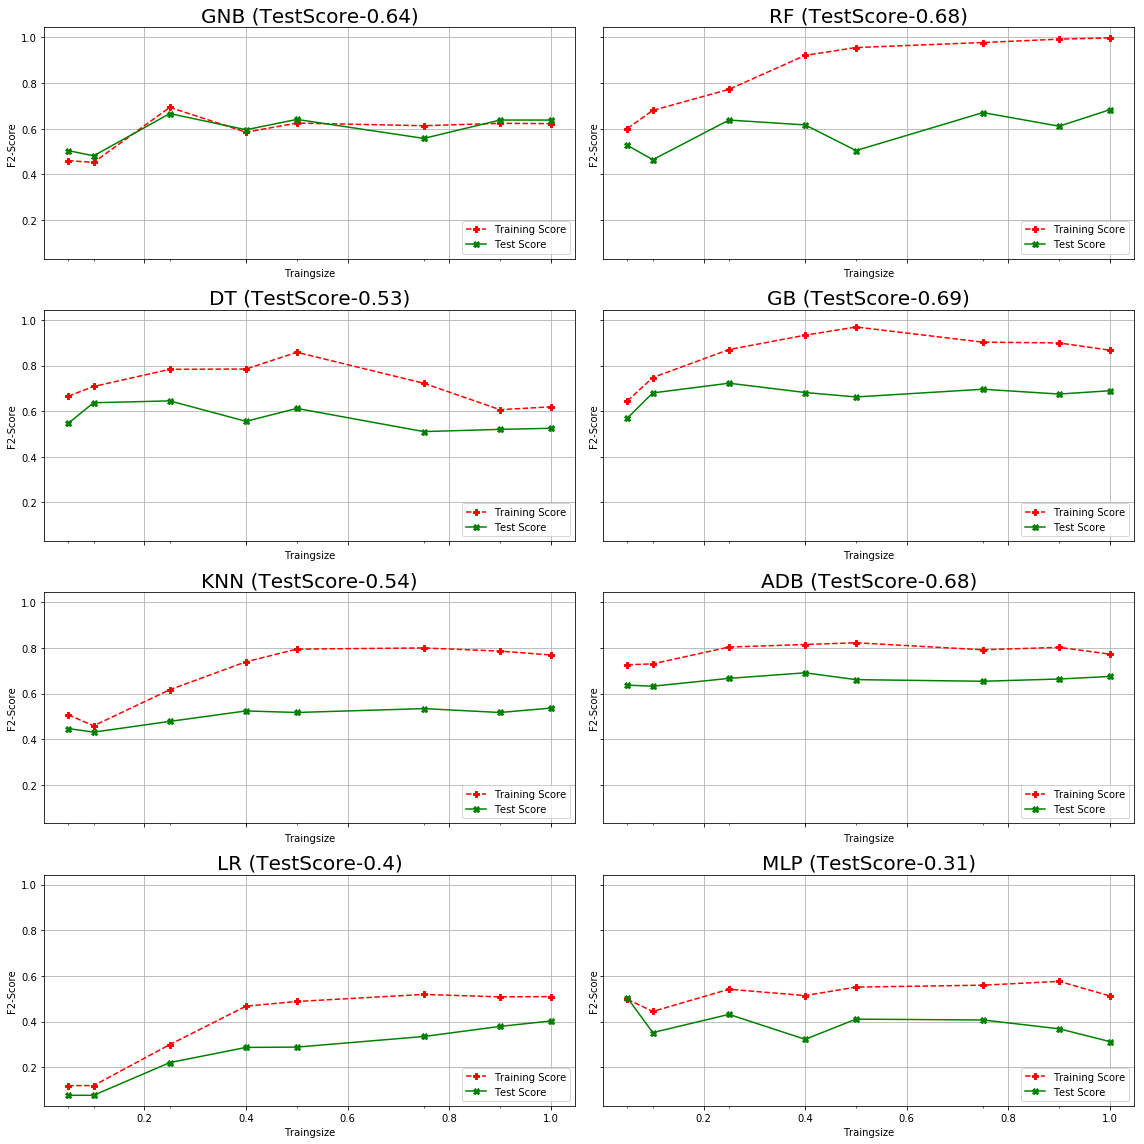

In [270]:
import random
# Ref - https://matplotlib.org/examples/pylab_examples/subplots_demo.html

#fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,16))
f, axarr = plt.subplots(4,2, figsize=(16,16), sharex=True, sharey=True)

y = random.sample(range(100), 8)
y1 = random.sample(range(50), 8)

for i, m in enumerate(classifiers):
    name, model = m
    
    train_results, test_results = train_predict_pipeline(name, model, sample_seze_index) 
    #plt.plot(index, train_results, "P--", color='red', label='Training Score', ax=axes[i,0])
    row = i%4
    col = int(i>3)
    #print("row:{} col:{}".format(row, col))
    
    axarr[row,col].plot(index, train_results, "P--", color='red', label='Training Score')
    axarr[row,col].plot(index, test_results, 'X-', color='green', label='Test Score')
    axarr[row,col].set_title(name + " (TestScore-" + str(round(test_results[-1],2))+')' , fontsize=20)
    axarr[row,col].grid()
    axarr[row,col].set_xlabel('Traingsize')
    axarr[row,col].set_ylabel('F2-Score')
    axarr[row,col].set_xticks(index, ['5%', '10%', '25%', '40%', '50%', '75%', '90%', '100%'])
    
    axarr[row,col].legend(loc="lower right")

f.tight_layout() 
plt.show()

#### <font color="blue">Observation</font>

- As per above visualization, 3 ensemble methods and Gaussian-Naive-Bayes classifiers scored comparitively better than other 5 supervised classifiers. 
- Most classifiers are underfitting. 

In the following section, we'll analyze all the classifiers and pick the top ones for further tuning. 

### 3e-2. Model Comparision and Selection

In [247]:
def model_feature_imp_plot(name, model):
    features_list = [x for x in X_test]
    
    y_pos = np.arange(len(features_list))
    performance = model.feature_importances_

    plt.bar(y_pos, performance, align='center', alpha=0.5, color='b')
    plt.xticks(y_pos, features_list)
    plt.ylabel('Importance score', fontsize=15)
    plt.title("Feature Importance of {}".format(name))
    
    plt.grid(True)
    plt.show()

0. GNB - Feature importance - NA

GNB
1. DT - Feature importance - [ 0.01680204  0.49983564  0.          0.03349477  0.07530417  0.22354777
  0.          0.15101561]



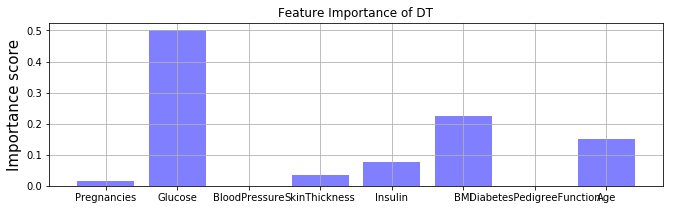

2. KNN - Feature importance - NA

KNN
3. LR - Feature importance - NA

LR
4. RF - Feature importance - [ 0.06619894  0.27057402  0.0803229   0.0768153   0.07393318  0.15468534
  0.11712331  0.160347  ]



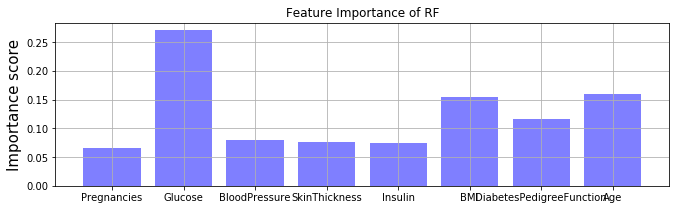

5. GB - Feature importance - [ 0.09082139  0.19466275  0.06881495  0.04664946  0.08777744  0.1775685
  0.19194241  0.1417631 ]



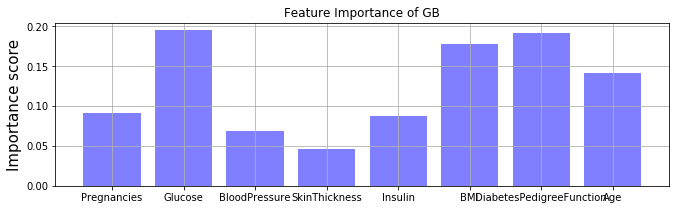

6. ADB - Feature importance - [ 0.06  0.22  0.1   0.08  0.06  0.22  0.16  0.1 ]



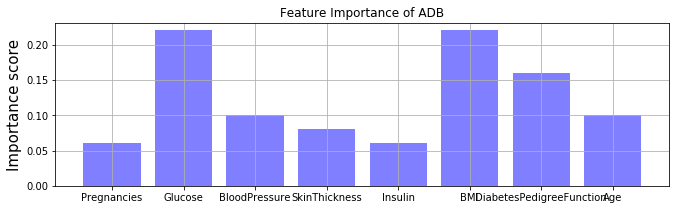

7. MLP - Feature importance - NA

MLP


,Name,F2-Score,Recall,Precision Score,Accuracy Score,DecisionTypes,TrainingTime
9,Benchmark-2,0.70,0.89,0.38,0.50,"TN=37, FP=70, FN=5, TP=42",0.000
8,Benchmark-1,0.69,1.00,0.31,0.31,"TN=0, FP=107, FN=0, TP=47",0.000
5,GB,0.69,0.68,0.73,0.82,"TN=95, FP=12, FN=15, TP=32",0.075
4,RF,0.68,0.68,0.70,0.81,"TN=93, FP=14, FN=15, TP=32",0.019
6,ADB,0.68,0.68,0.65,0.79,"TN=90, FP=17, FN=15, TP=32",0.082
0,GNB,0.64,0.64,0.64,0.78,"TN=90, FP=17, FN=17, TP=30",0.002
2,KNN,0.54,0.53,0.56,0.73,"TN=87, FP=20, FN=22, TP=25",0.001
1,DT,0.53,0.49,0.74,0.79,"TN=99, FP=8, FN=24, TP=23",0.002
3,LR,0.40,0.36,0.74,0.77,"TN=101, FP=6, FN=30, TP=17",0.001
7,MLP,0.31,0.28,0.65,0.73,"TN=100, FP=7, FN=34, TP=13",0.180


In [425]:
from time import time

names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f2_scores = []
decision_types = []
training_times = []

for ind, model in enumerate(classifiers):
    name, model = model
    start = time()
    model.fit(X_train, y_train)
    end = time()
    
    training_time = end - start
    training_times.append(round(training_time,3))
    
    y_pred = model.predict(X_test)
    accuracy_scores.append(round(accuracy_score(y_test, y_pred),2))
    precision_scores.append(round(precision_score(y_test, y_pred),2))
    recall_scores.append(round(recall_score(y_test, y_pred),2))
    
    cm = confusion_matrix(y_test.values, y_pred)
    tn, fp, fn, tp =  cm.ravel()
    
    decision_type = "TN={}, FP={}, FN={}, TP={}".format(tn, fp, fn, tp)
    
    decision_types.append(decision_type)
    
    f2_scores.append(round(fbeta_score(y_test, y_pred, beta=2),2))
    try:
        print("{}. {} - Feature importance - {}\n".format(ind, name, model.feature_importances_))
        model_feature_imp_plot(name, model)
    except (RuntimeError, AttributeError):
        print("{}. {} - Feature importance - NA\n".format(ind, name))
        print(name, )
    names.append(name)
    
# Adding Benchmark scores for doing a comparitive analysis
names.append("Benchmark-1")
accuracy_scores.append(0.31)
precision_scores.append(0.31)
recall_scores.append(1)
f2_scores.append(0.69)
decision_types.append("TN=0, FP=107, FN=0, TP=47")
training_times.append(0)

names.append("Benchmark-2")
accuracy_scores.append(0.5)
precision_scores.append(0.38)
recall_scores.append(0.89)
f2_scores.append(0.7)    
decision_types.append("TN=37, FP=70, FN=5, TP=42")
training_times.append(0)

tr_split = pd.DataFrame({'Name': names, 'Accuracy Score': accuracy_scores, 'Precision Score' : precision_scores,
                         'Recall': recall_scores, 'F2-Score': f2_scores, 
                         'DecisionTypes' : decision_types, "TrainingTime" : training_times})
display(tr_split[['Name', 'F2-Score','Recall','Precision Score','Accuracy Score', 'DecisionTypes', 'TrainingTime']].sort_values(['F2-Score', 'Recall'], ascending=[False, False]))

tr_split.to_csv('score_comparision.csv')


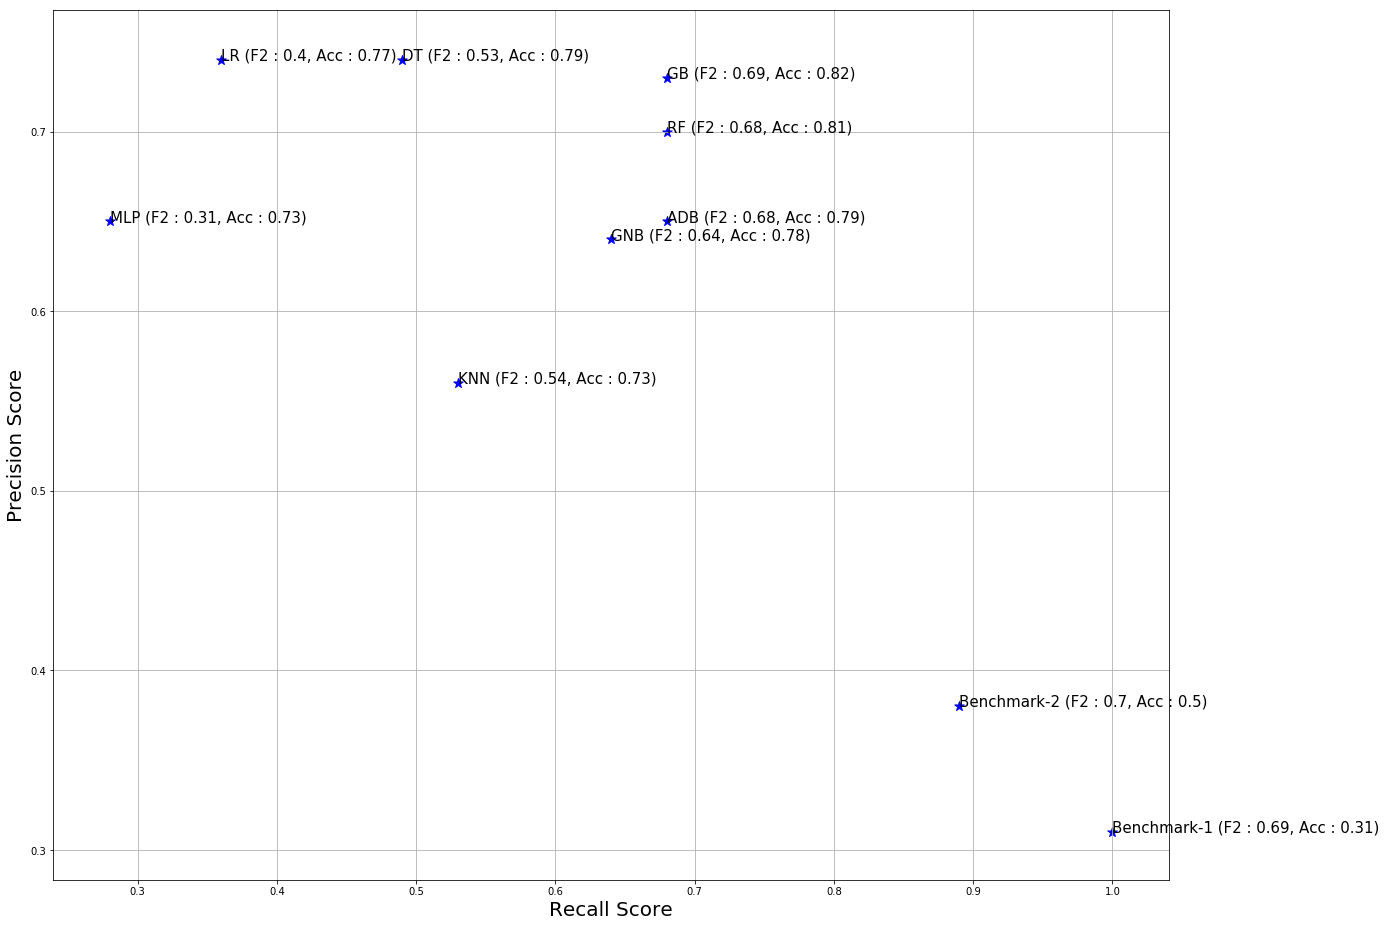

In [402]:
fig, ax = plt.subplots(figsize=(20,16))
area = (100 * f2_scores)
ax.scatter(recall_scores, precision_scores, s=100,marker='*',color='b',linewidths=1)
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)

ax.set_xlabel("Recall Score", fontsize=20)
ax.set_ylabel("Precision Score", fontsize=20)

for i, txt in enumerate(names):
    ax.annotate(txt + " (F2 : " + str(round(f2_scores[i],2)) + ", Acc : " +str(round(accuracy_scores[i],2)) + ")", (recall_scores[i],precision_scores[i]), fontsize=15)

ax.grid(True)

#### <font color="blue">Observation</font>

- Based on the above data, GradientBoost worked really well.

In the following section, we've turned the GraidentBoost instance for optimal performance.  

### 3e-3. Model Refinement using parameter tuning

In this section, a grid search optimization is used for the GB over the entire training set (X_train and y_train) by tuning at least one parameter to improve upon the untuned model's F-score.

In [420]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=19)

#clf = AdaBoostClassifier(random_state=19)
# 'n_estimators':[50, 60, 75,100, 125,150,200,250]
# ADB didn't produce any better result

parameters = {
                'learning_rate': [0.1, 0.01],
                'n_estimators':[50,200,225,250,300],
                #'max_features':[2,3,4,5,6,7]
                #'max_depth': [2,3,4,5,6,7],
                #'min_samples_leaf':[2,3,4,5,8,10,12,14],
                #'min_samples_split':[2,3,4,5,6]
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=2)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

#print(grid_fit.cv_results_)
print("best_params - {}, best_score - {}".format(grid_fit.best_params_, round(grid_fit.best_score_,2)))

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("\nUnoptimized model\n---------------")
print ("Accuracy score on testing data: {:.2f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.2f}".format(fbeta_score(y_test, predictions, beta = 2)))
normal_recall_score = recall_score(y_test.values, predictions)
print("Recall - {}".format(round(normal_recall_score,2)))
print ("Precision: {:.2f}".format(precision_score(y_test, predictions)))

print ("\nOptimized Model\n---------------")
print ("Final accuracy score on the testing data: {:.2f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.2f}".format(fbeta_score(y_test, best_predictions, beta = 2)))
best_recall_score = recall_score(y_test.values, best_predictions)
print("Recall - {}".format(round(best_recall_score,2)))
print ("Precision: {:.2f}".format(precision_score(y_test.values, best_predictions)))

#print("{}. {} - Feature importance - {}\n".format(ind, name, model.feature_importances_))
#model_feature_imp_plot(name, model)

best_params - {'n_estimators': 250, 'learning_rate': 0.1}, best_score - 0.62

Unoptimized model
---------------
Accuracy score on testing data: 0.82
F-score on testing data: 0.69
Recall - 0.68
Precision: 0.73

Optimized Model
---------------
Final accuracy score on the testing data: 0.84
Final F-score on the testing data: 0.76
Recall - 0.77
Precision: 0.72


# 4. Results

## A. Final model evaluation and validation

#### Confusion Matrix of the Optimized Model


TN = 93, FP = 14, FN = 11, TP = 36


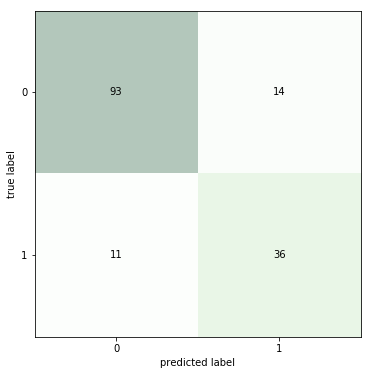

In [427]:
cm = confusion_matrix(y_test.values, best_predictions)
tn, fp, fn, tp =  cm.ravel()
print ("\nTN = {}, FP = {}, FN = {}, TP = {}".format(tn, fp, fn, tp))

Recall = [tp/(tp + fn)]

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6,6), cmap="Greens")
plt.show()

#### Learning curve comparision of Non-optimized and Optimized Models

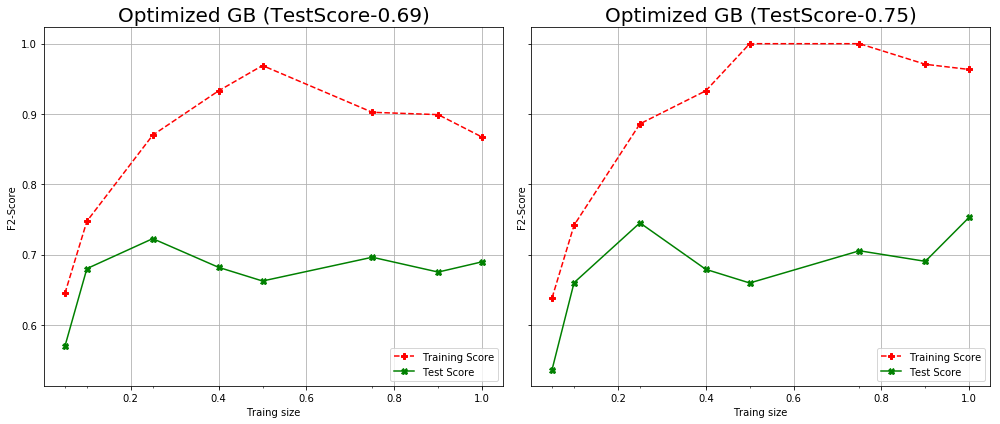

In [328]:
#train_results, test_results = train_predict_pipeline("Optimized GB", best_clf, sample_seze_index)

f, axarr = plt.subplots(1,2, figsize=(14,6), sharex=True, sharey=True)

y = random.sample(range(100), 8)
y1 = random.sample(range(50), 8)

for i, model in enumerate([clf, best_clf]):
    #name, model = m
    
    train_results, test_results = train_predict_pipeline("Optimized GB", model, sample_seze_index)

    row, col = 0, i

    axarr[col].plot(index, train_results, "P--", color='red', label='Training Score')
    axarr[col].plot(index, test_results, 'X-', color='green', label='Test Score')

    test_result_full_testdata = test_results[-1]
    axarr[col].set_title("Optimized GB" + " (TestScore-" + str(round(test_result_full_testdata,2))+')' , fontsize=20)

    axarr[col].grid()
    axarr[col].set_xlabel('Traing size')
    axarr[col].set_ylabel('F2-Score')
    axarr[col].set_xticks(index, ['5%', '10%', '25%', '40%', '50%', '75%', '90%', '100%'])
    axarr[col].legend(loc="lower right")

f.tight_layout() 
plt.show()

0. Un-optimized GB - Feature importance - [ 0.09082139  0.19466275  0.06881495  0.04664946  0.08777744  0.1775685
  0.19194241  0.1417631 ]



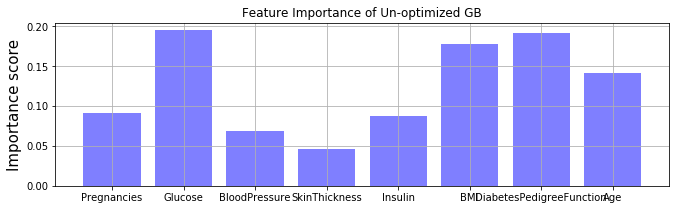

0. Optimized GB - Feature importance - [ 0.10955263  0.15759312  0.0754559   0.06877068  0.09692382  0.15737815
  0.21879412  0.11553158]



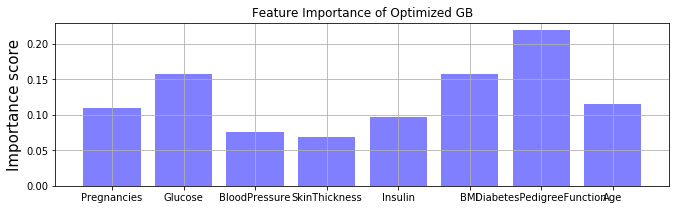

In [334]:
name, model = "Un-optimized GB", clf
print("{}. {} - Feature importance - {}\n".format(0, name, model.feature_importances_))
model_feature_imp_plot(name, model)

name, model = "Optimized GB", best_clf
print("{}. {} - Feature importance - {}\n".format(0, name, model.feature_importances_))
model_feature_imp_plot(name, model)

## B. Justification

,Name,F2-Score,Recall,Precision Score,Accuracy Score,DecisionTypes
2,Best Prediciton Model,0.76,0.77,0.72,0.84,"TN=93,FP=14,FN=11,TP=36"
1,Benchmark-2,0.70,0.89,0.38,0.50,"TN=37, FP=70, FN=5, TP=42"
0,Benchmark-1,0.69,1.00,0.31,0.31,"TN=0, FP=107, FN=0, TP=47"


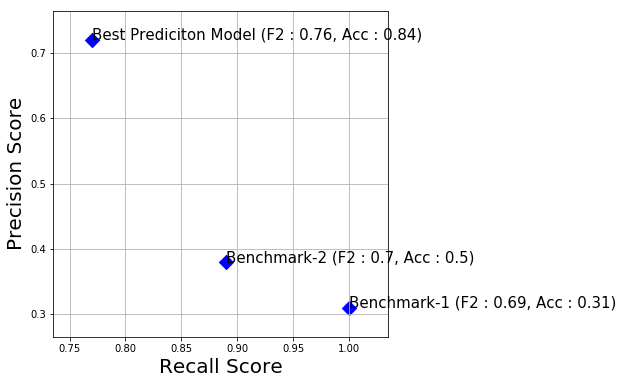

In [426]:
fig, ax = plt.subplots(figsize=(6,6))
area = (100 * f2_scores)

#Data of the best prediction model
recall_scores.append(0.77)
accuracy_scores.append(0.84)
f2_scores.append(0.76)
precision_scores.append(0.72)
decision_types.append("TN=93,FP=14,FN=11,TP=36")
names.append("Best Prediciton Model")

#Existing Benchmark models
recall_scores = recall_scores[-3:]
accuracy_scores = accuracy_scores[-3:] 
precision_scores = precision_scores[-3:] 
f2_scores = f2_scores[-3:] 
names = names[-3:]
decision_types = decision_types[-3:]

final_vs_benchmakrs_datacomp = pd.DataFrame({'Name': names, 'Accuracy Score': accuracy_scores, 
                         'Recall': recall_scores, 'F2-Score': f2_scores, 'Precision Score':precision_scores,
                         'DecisionTypes' : decision_types})

display(final_vs_benchmakrs_datacomp[['Name', 'F2-Score','Recall','Precision Score','Accuracy Score', 'DecisionTypes']].sort_values(['F2-Score', 'Recall'], ascending=[False, False]))

'''
print(recall_scores[-3:])
print(accuracy_scores[-3:])
print(type(names), names[-3:])
'''

ax.scatter(recall_scores, precision_scores, s=100,marker='D',color='b',linewidths=1)
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)

ax.set_xlabel("Recall Score", fontsize=20)
ax.set_ylabel("Precision Score", fontsize=20)

for i, txt in enumerate(names):
    ax.annotate(txt + " (F2 : " + str(round(f2_scores[i],2)) + ", Acc : " +str(round(accuracy_scores[i],2)) + ")", (recall_scores[i],precision_scores[i]), fontsize=15)

ax.grid(True)

# PCA

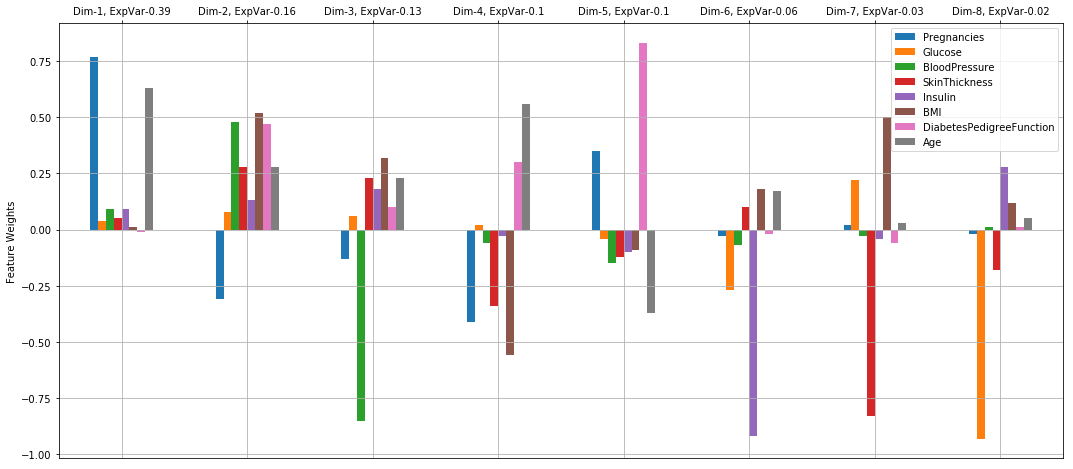

In [477]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(X_train.keys())).fit(X_train)

# Generate PCA results plot
#pca_results = pca_results(X_train, pca)

#Dimension indexing
dims = ["Dim-{}, ExpVar-{}".format(ind+1, round(val,2))  for ind, val in enumerate(pca.explained_variance_ratio_)] 

# PCA components
components = pd.DataFrame(np.round(pca.components_, 2), columns = X_train.keys())
components.index = dims
#print(components)

# Plot dimesion on the x-axis and corresponding featurers on y
fig, ax = plt.subplots(figsize = (18,8))
components.plot(ax = ax, kind = 'bar');
ax.set_ylabel("Feature Weights")
ax.set_xticklabels(dims, rotation=0)
ax.grid('on',axis='x' )
ax.grid('on', axis='y' )
ax.xaxis.set_ticks_position('top')

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.